## Respondents Analysis ## 

The purpose of this analysis is to understand the profile of respondents from a poll conducted by Ipsos for FiveThirtyEight. The poll, carried out from September 15th to 25th, surveyed 8,327 U.S. citizens. To ensure representation, the sample oversampled young, Black, and Hispanic respondents and was subsequently weighted according to general population benchmarks for U.S. citizens from the U.S. Census Bureau’s Current Population Survey.

The data is available at: https://github.com/fivethirtyeight/data/tree/master/non-voters

The first part of this analysis provides an overview of the collected data. The second part presents a statistical test to examine whether a correlation exists between education level and income increase.


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2, chi2_contingency

In [2]:
def first_view(df):
    """
    This function allows to check the variables name, and types.
    Additionaly it allows to check the percentage of null values for each variable

    input: dataframe to be queried
    """
    dtype=df.info()
    null_percentage=(df.isnull().sum() / df.shape[0] * 100)
    null_df = pd.DataFrame({'variable': null_percentage.index, 
                        'null_percentage': null_percentage.values})
    null_df.columns=[['variables', 'null_percentage']]
    return print(dtype, 
                 null_df)

In [3]:
def calculate_percentages(df, x_col, hue_col, order):
    """Calculates percentages for stacked bar chart."""
    total_counts = df.groupby(x_col)[hue_col].count().reindex(order, fill_value=0) #Reindex to ensure correct order and 0 fill
    grouped_counts = df.groupby([x_col, hue_col]).size().unstack(fill_value=0).reindex(order, fill_value=0) #Reindex to ensure correct order and 0 fill
    percentages = np.round((grouped_counts.T / total_counts).T * 100,2)
    return percentages

In [4]:
len(pd.read_csv('database/nonvoters_data.csv', nrows=1).columns)

119

In [5]:
data=pd.read_csv('database/nonvoters_data.csv',usecols=
                 ('ppage', 'educ', 'race', 'gender','income_cat', 
                  'voter_category'))

In [6]:
data.head()

,ppage,educ,race,gender,income_cat,voter_category
0,73,College,White,Female,$75-125k,always
1,90,College,White,Female,$125k or more,always
2,53,College,White,Male,$125k or more,sporadic
3,58,Some college,Black,Female,$40-75k,sporadic
4,81,High school or less,White,Male,$40-75k,always


In [6]:
first_view(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ppage           5836 non-null   int64 
 1   educ            5836 non-null   object
 2   race            5836 non-null   object
 3   gender          5836 non-null   object
 4   income_cat      5836 non-null   object
 5   voter_category  5836 non-null   object
dtypes: int64(1), object(5)
memory usage: 273.7+ KB
None         variables null_percentage
0           ppage             0.0
1            educ             0.0
2            race             0.0
3          gender             0.0
4      income_cat             0.0
5  voter_category             0.0


## Respondents Profile ##

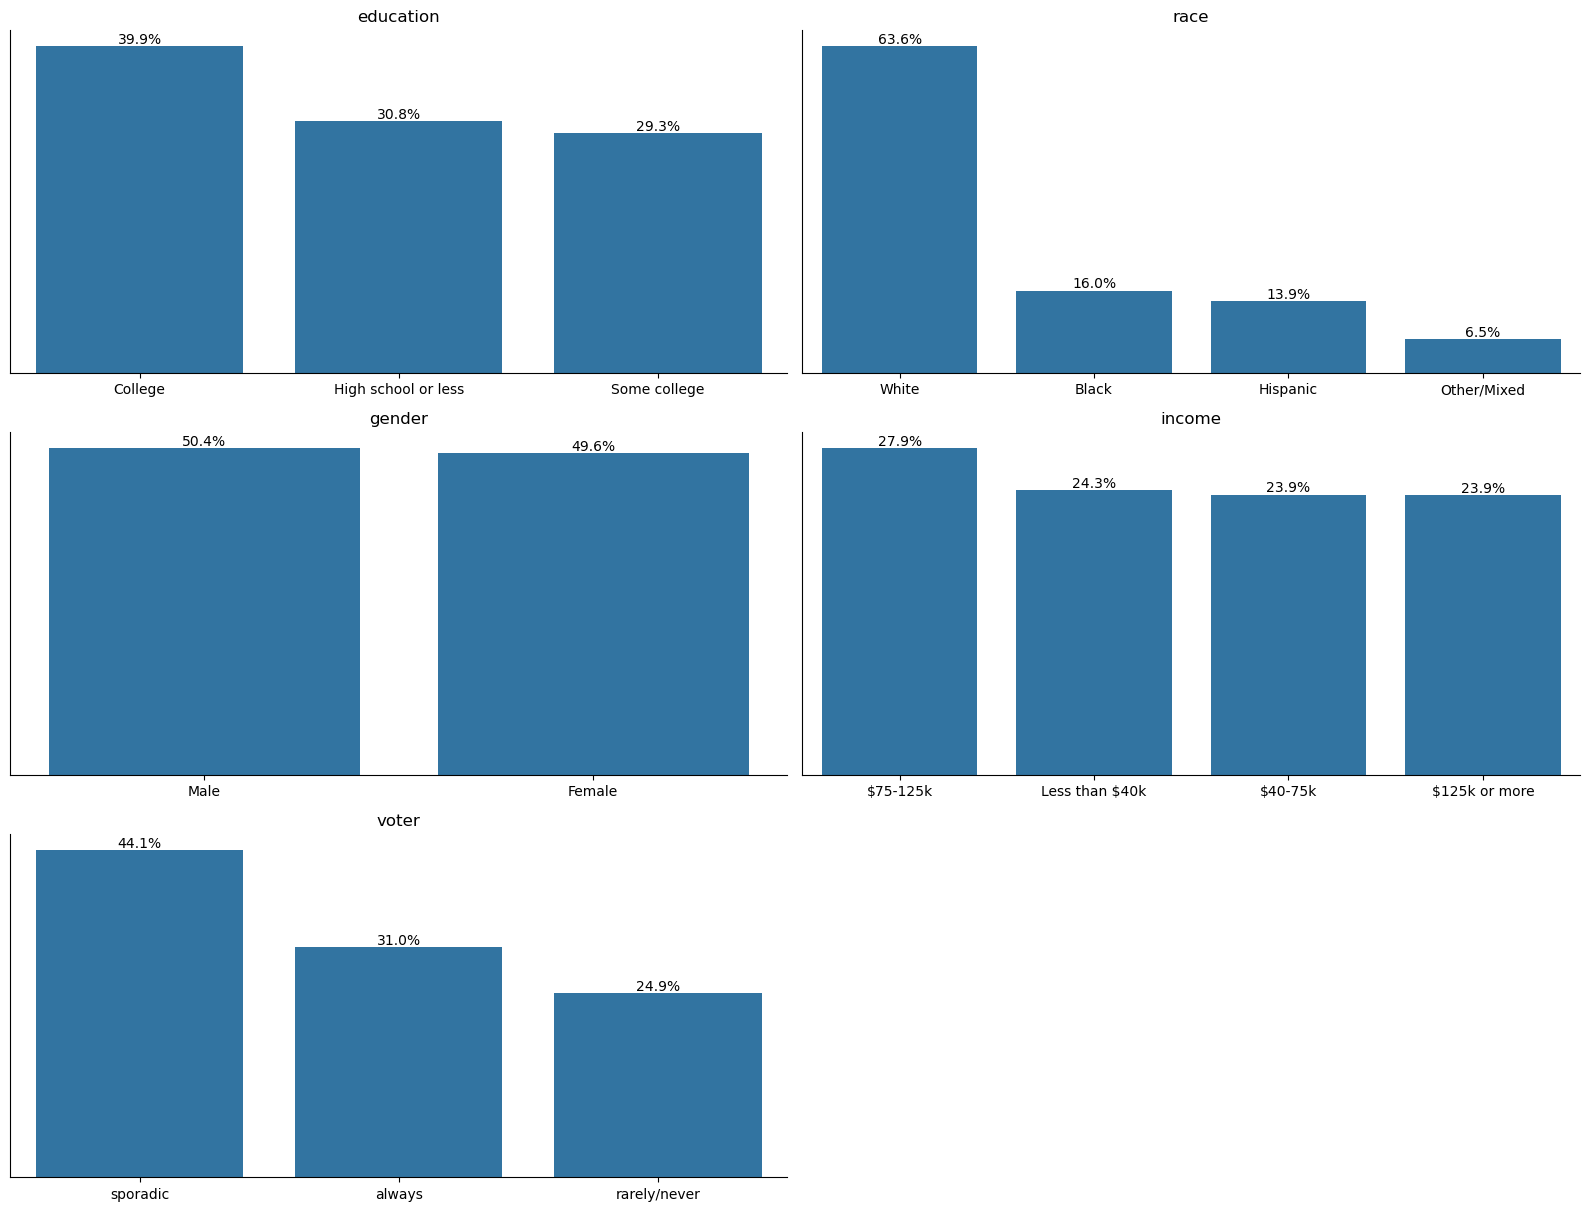

In [7]:
columns_names=data.columns[1:]
num_plots=len(columns_names)
rows=(num_plots+3)//2
plot_name=['education', 'race', 'gender', 'income', 'voter']

fig, axes = plt.subplots(rows, 2, figsize=(16, 4 * rows)) # Add hspace
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_names):
    df = data[col] #extract column data.
    ax=sns.countplot(x=df, 
                  ax=axes[i],
                 order=df.value_counts().index)#plot the data in the current axis.
    axes[i].set_title(plot_name[i])  # Set title for each subplot
    ax.set_xlabel('') 
    ax.set_ylabel('')     
    #ax.set_xticks([])
    ax.set_yticks([])
    sns.despine()

    total = len(df) #calculate the total count of the column.
    
    for p in ax.patches:
        height = p.get_height()
        percentage = '{:.1f}%'.format(100 * height / total) #calculate percentage.
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')       

if num_plots < rows * 2:
    for j in range(num_plots, rows * 2):
        fig.delaxes(axes[j])

        
plt.tight_layout()

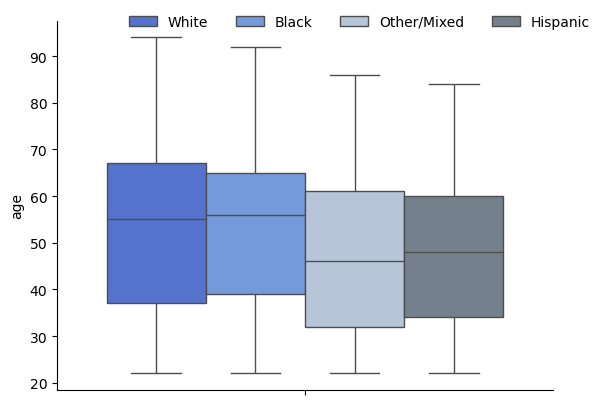

In [8]:
ax=sns.boxplot(data=data, y='ppage', hue='race', palette=['royalblue', 'cornflowerblue','lightsteelblue', 'slategrey'])
ax.set_ylabel('age') 
plt.legend(frameon=False, ncol=len(
    data['race'].unique()),bbox_to_anchor=(1.1, 1.05))
sns.despine();

In [9]:
data.groupby('race')['ppage'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Black,932.0,53.001073,15.696743,22.0,39.0,56.0,65.0,92.0
Hispanic,813.0,47.908979,15.745719,22.0,34.0,48.0,60.0,84.0
Other/Mixed,381.0,47.356955,16.441079,22.0,32.0,46.0,61.0,86.0
White,3710.0,52.640162,17.557767,22.0,37.0,55.0,67.0,94.0


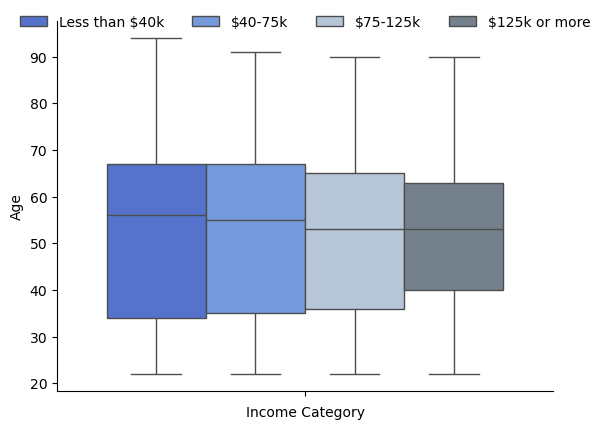

In [10]:
order=['Less than $40k','$40-75k','$75-125k','$125k or more']
ax=sns.boxplot(data=data, y='ppage', 
               hue='income_cat', 
               palette=['royalblue', 'cornflowerblue','lightsteelblue', 'slategrey'],
              hue_order=order)
ax.set_xlabel('Income Category') 
ax.set_ylabel('Age') 
plt.legend(frameon=False, ncol=len(
    data['race'].unique()),bbox_to_anchor=(1.1, 1.05))
sns.despine();

In [11]:
data.groupby('income_cat')['ppage'].describe()

,count,mean,std,min,25%,50%,75%,max
income_cat,,,,,,,,
$125k or more,1394.0,51.870158,15.233467,22.0,40.0,53.0,63.0,90.0
$40-75k,1396.0,51.899713,17.746401,22.0,35.0,55.0,67.0,91.0
$75-125k,1628.0,50.778870,16.786273,22.0,36.0,53.0,65.0,90.0
Less than $40k,1418.0,52.368124,18.354808,22.0,34.0,56.0,67.0,94.0


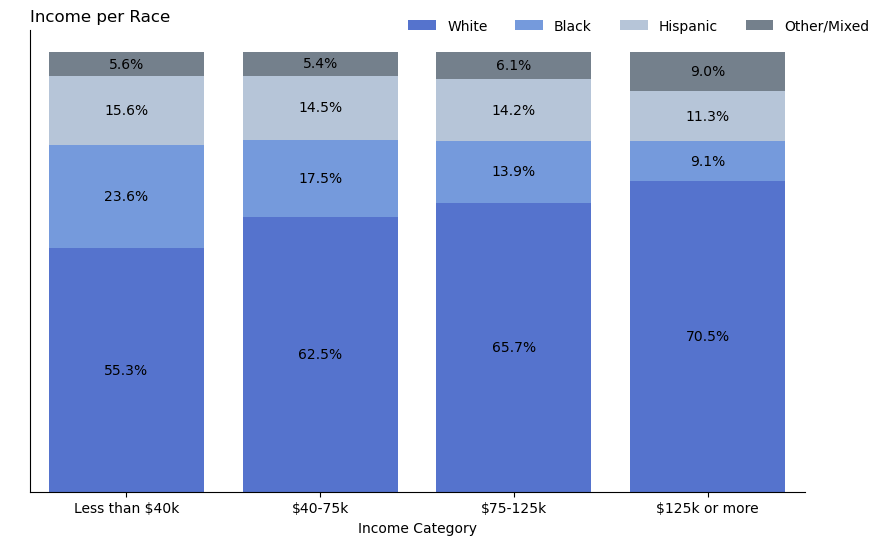

In [12]:
order=['Less than $40k','$40-75k','$75-125k','$125k or more']
percentages=calculate_percentages(data, 'income_cat', 'race', order)
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed

bottom = None #Initialize for stacking
for hue_value, color in zip(['White','Black','Hispanic', 'Other/Mixed'], 
                            ['royalblue', 'cornflowerblue','lightsteelblue', 'slategrey']):
    sns.barplot(x=percentages.index, y=percentages[hue_value], 
                color=color, ax=ax, label=hue_value, bottom=bottom)
    if bottom is None:
        bottom = percentages[hue_value]
    else:
        bottom += percentages[hue_value]

# 3. Add percentage labels above the stacked bars:
for p in ax.patches:
    height = p.get_height()
    if height > 0: #Avoid labels for 0 height bars.
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2  # Center vertically within the stack
        percentage = height #Height is already the percentage
        ax.text(x, y, f'{percentage:.1f}%', ha='center', va='center', color='black')  # Adjust color as needed

sns.despine()
plt.xlabel("Income Category") #Optional label
plt.ylabel(" ") #Optional label
plt.yticks(ticks=[])
plt.title("Income per Race", loc='left')
plt.legend(frameon=False, ncol=len(
    data['race'].unique()),bbox_to_anchor=(1.1, 1.05)); #Show legend if needed

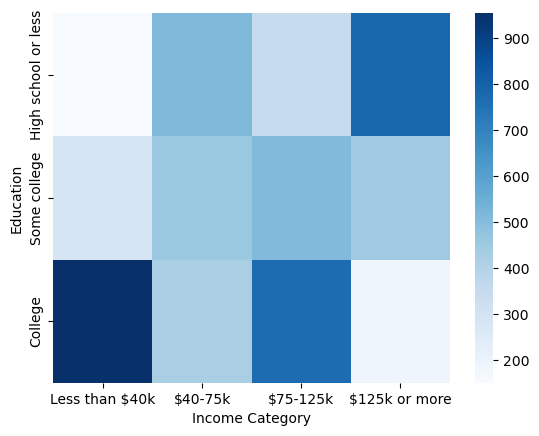

In [13]:
cross_tab=pd.crosstab(data['educ'],data['income_cat'])
cross_order_column=['Less than $40k','$40-75k','$75-125k','$125k or more']
cross_tab.columns=cross_order_column

education_order=['High school or less', 'Some college', 'College']
cross_tab = cross_tab.reindex(education_order)

#annotations = overall_percentages.round(1).astype(str) + '%'
ax=sns.heatmap(cross_tab,fmt='', cmap='Blues')
ax.set_xlabel('Income Category');
ax.set_ylabel('Education');

In [14]:
cross_tab

overall_total = cross_tab.values.sum()
overall_percentages = np.round((cross_tab / overall_total) * 100,2)

overall_percentages

,Less than $40k,$40-75k,$75-125k,$125k or more
educ,,,,
High school or less,2.57,8.81,6.00,13.40
Some college,4.97,7.86,8.76,7.71
College,16.35,7.25,13.14,3.19


In [15]:
data.educ.unique()

array(['College', 'Some college', 'High school or less'], dtype=object)

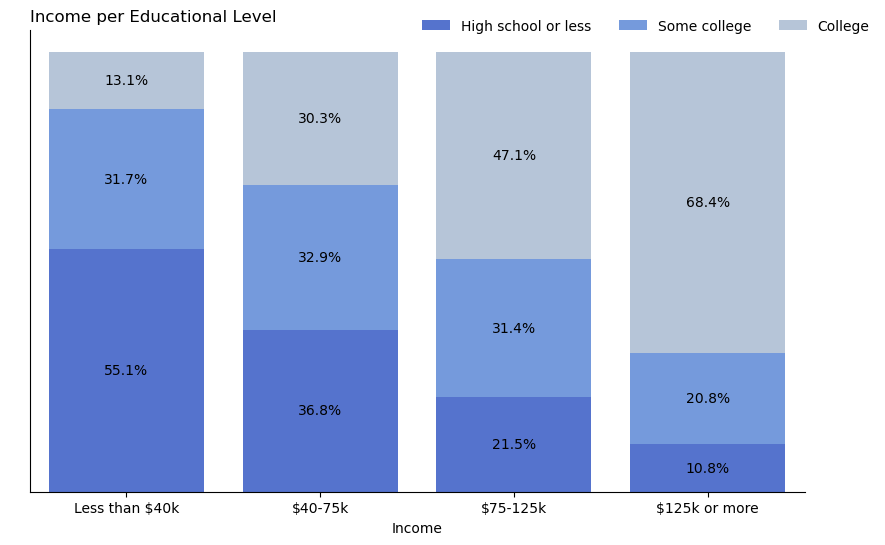

In [16]:
order=['Less than $40k','$40-75k','$75-125k','$125k or more']
percentages=calculate_percentages(data, 'income_cat', 'educ', order)
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed

bottom = None #Initialize for stacking
for hue_value, color in zip(['High school or less','Some college','College'], 
                            ['royalblue', 'cornflowerblue','lightsteelblue']):
    sns.barplot(x=percentages.index, y=percentages[hue_value], 
                color=color, ax=ax, label=hue_value, bottom=bottom)
    if bottom is None:
        bottom = percentages[hue_value]
    else:
        bottom += percentages[hue_value]

# 3. Add percentage labels above the stacked bars:
for p in ax.patches:
    height = p.get_height()
    if height > 0: #Avoid labels for 0 height bars.
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2  # Center vertically within the stack
        percentage = height #Height is already the percentage
        ax.text(x, y, f'{percentage:.1f}%', ha='center', va='center', color='black')  # Adjust color as needed

sns.despine()
plt.xlabel("Income") #Optional label
plt.ylabel(" ") #Optional label
plt.yticks(ticks=[])
plt.title("Income per Educational Level", loc='left')
plt.legend(frameon=False, ncol=len(
    data['race'].unique()),bbox_to_anchor=(1.1, 1.05)); #Show legend if needed

## Chi Square Test ##

In [17]:
cross_table_observed=pd.crosstab(data['educ'],data['income_cat'], margins=True)
cross_table_observed

income_cat,$125k or more,$40-75k,$75-125k,Less than $40k,All
educ,,,,,
College,954,423,767,186,2330
High school or less,150,514,350,782,1796
Some college,290,459,511,450,1710
All,1394,1396,1628,1418,5836


In [18]:
data_observed=np.array(cross_table_observed) #matriz de valores
alpha=0.05 # significância 
dof=len(cross_table_observed)-1 #graus de liberdade

In [22]:
qui_quadrado, p, graus_liberdade, _ = chi2_contingency(cross_table_observed)
valor_critico = chi2.ppf(1 - alpha, graus_liberdade)

In [23]:
print("Qui-Quadrado:", qui_quadrado)
print("Valor crítico:", valor_critico)
print("Valor p:", p)

Qui-Quadrado: 1155.5386386506407
Valor crítico: 21.02606981748307
Valor p: 6.476376270879267e-240


In [27]:
# Avalie a significância estatística
if p < alpha:
    print("H0 is rejected, it means that the statistical evidence from the collected data is strong enough to discard the claim that there is no relationship.")
else:
    print("H0 can't be rejected")


H0 is rejected, it means that the statistical evidence from the collected data is strong enough to discard the claim that there is no relationship.


We have statistics evidence that exists a correlation between education level and income increase